<a href="https://colab.research.google.com/github/kchenTTP/python-web-scraping/blob/main/Web_Scraping_with_Python_Part_1_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping with Python Part 1**

Web scraping is a technique used to extract and gather data from websites automatically using Python. We will be navigating through web pages, retrieving specific information, and store it in this class.


# Keyword Definition

**Web Scraper**: The script or program used to automate the process of web scraping

**HTTP**: Hypertext Transfer Protocol, the protocol used for transmitting data over the internet

**Requests**: Users and web scrapers send HTTP requests to wesites to receive the webpage
  - [List of Request Methods](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods)

**Responses**: When an website server receives a request, it processes it and sends back a response

**Status Codes**: Three-digit code that is included in the response that provides information about the status of the request
  - [List of Status Codes](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

**HTML**: Hypertext Markup Language, the standard markup language used to structure web pages

**CSS Selectors**: Cascading Style Sheets (CSS) selectors allow you to target and select specific HTML elements based on their attributes, classes, or IDs

**DOM**: Document Object Model, a representation of the structure and content of an HTML or XML document

> Tip: Use Chrome's developer tool to look at HTML documents
1. In a Chrome based browser, `right click` -> `inspect` to open up the developer tool
2. Find HTML document in `Elements` tab

# How Web Scraping Works?

Web scraping operates by sending HTTP requests to websites and then parsing the HTML or XML code of the web pages to extract the desired data. This data can include text, images, links, tables, and other structured or unstructured content present on the website

> ⚠️ Remember that while web scraping can be a powerful tool, it is important to adhere to legal and ethical guidelines and respect the terms of service of the websites you scrape

## Import Python Packages

1. [`requests`](https://requests.readthedocs.io/en/latest/): Allows us to make HTTP requests to access resources on the internet
2. [`bs4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) (`BeautifulSoup`): Extracts information from HTML and XML documents
3. [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image): Allows us to display images
4. [`pprint`](https://docs.python.org/3/library/pprint.html): "pretty print," prints Python data structures in a well-formatted, aesthetically pleasing way


In [ ]:
#@title Check available python packages
! pip list

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
from IPython.display import display, Image
from pprint import pprint

# Example: New York Times Best Sellers

We'll be scrapping information from The New York Times Best Sellers page to learn the basics of web scrapping and the `BeautifulSoup` library

**steps**
1. Visit [The New York Times Best Sellers](https://www.nytimes.com/books/best-sellers/)

2. Open developer tool, find where the information is located inside the HTML

3. Use `BeautifulSoup` to retrieve HTML for entire page

4. Use `BeautifulSoup` to retrieve specific informaiton inside HTML


In [ ]:
#@title Save website url to variable { run: "auto" }
url = "https://www.nytimes.com/books/best-sellers/" #@param {type:"string"}

## Write a function that sends HTTP `Get` request to retrieve webpage HTML

In [ ]:
def get_web_content(url):
  response = requests.get(url)
  return bs(response.content)

In [ ]:
# get html of website
soup = get_web_content(url)
pprint(soup)

## Extracting data from HTML
- `find()`: Returns the first matching item
- `find_all()`: Returns all matchin items

Arguments:
- `name`: HTML tag names
  - ex. `h1`, `p`, `a`
- `<html_attr>`: HTML attributes
  - ex. `class_='cover-img'`

### Find by Tag Name

In [ ]:
# find every <p> tag
pprint(soup.find_all('p'))

In [ ]:
# find every <title> tag
pprint(soup.title)

### Find by HTML Attributes
- Use `<html_attr>=<value>` to find items
- Use `attr` argument with a dictionary to find items

In [ ]:
# find items using html attribute
pprint(soup.find_all(itemprop='name'))

In [ ]:
# find items using dictionary
pprint(soup.find(attrs={'data-testid': 'header-title'}))

### Find by CSS Classes

In [ ]:
pprint(soup.find(class_='css-68u1tu'))   # class attribute requires an underscore at the end cause class is a reserved keyword in python

### Accessing data in HTML Elements

In [ ]:
title_element = soup.find(class_='css-68u1tu')

# get the inner text from an element
print(title_element.text)

# get the tag name of an element
print(title_element.name)

# get the value of an attribute by treating element as a dictionary
print(title_element['data-testid'])
print(title_element.get('data-testid'))

## **Task: Scrape Book Names, Categories, Author, Cover Images, and ISBNs**

**Steps**
1. Open developer tool to find where the data you want lives inside the HTML document
2. Find common attributes of the data

### 1. Find All Book Names
We can see all book names have the same CSS class: `css-i1z3c1`, so let's save the class as a variable

In [ ]:
# css class all the book title shares
book_class = None

#### Write a Function that Returns a List Using CSS Class Name

In [ ]:
# Your code here


In [ ]:
#@title Kang's Implentation (Write your own code before checking answer)
def get_list_with_class(soup, class_name):
  """
  Function for getting list item text using html class attribute
  """

  items = []

  for i in soup.find_all(class_ = class_name):
    items.append(i.text)
  return items

In [ ]:
# get all the best sellers title
book_titles_list = None
print('Number of books:', len(book_titles_list))

In [ ]:
# print out the list
book_titles_list

### 2. Find All Category Names
We can see all book categories have the same CSS class: `css-nzgijy`, so let's save the class as a variable

In [ ]:
# css class all the book categories shares
cat_class = None

In [ ]:
# get all the categories
categories_list = None
print('Number of Categories:', len(categories_list))

In [ ]:
# print out the list
categories_list

### 3. Find All Author Names
All authors have the same HTML attribute: `itemprop='author'`, so let's use the HTML attribute to scrape all the author names

In [ ]:
author_list = []
# Your code here


In [ ]:
#@title Kang's Implentation (Write your own code before checking answer)
author_list = []

for a in soup.find_all(itemprop='author'):
  author_list.append(a.text.replace('by ', ''))

print('Number of Authors:', len(author_list))

In [ ]:
# print out the list
author_list

### 4. Find All Book Cover Images
We can see all book cover images have the same HTML attribute: `itemprop='image'`, so let's use the HTML attribute to scrape all the image URLs

In [ ]:
book_img_list = []
# Your code here


In [ ]:
#@title Kang's Implentation (Write your own code before checking answer)
book_img_list = []

for img in soup.find_all(itemprop='image'):
  book_img_list.append(img['src']) # use the 'src' attribute to retrieve the url of the image

print('Number of Images:', len(book_img_list))

In [ ]:
# print out all the urls
book_img_list

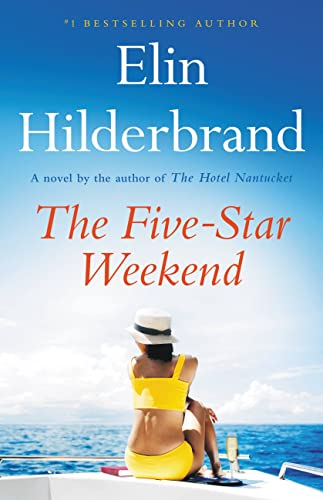

In [ ]:
#@title Show All the Images We've Scrapped { run: "auto", vertical-output: true }
img_idx = 0 #@param {type:"slider", min:0, max:54, step:1}
display(Image(book_img_list[img_idx]))

### 5. Find All Book ISBNs
If we explore the image urls a little bit, we can see that all the image filenames are actually their ISBNs. Let's store all the ISBNs into a list by parsing it from the url


In [ ]:
isbn_list = []
# Your code here


In [ ]:
#@title Kang's Implentation (Write your own code before checking answer)
isbn_list = []

for image in book_img_list:
  isbn_list.append(image.split('/')[-1].split('.')[0])

print('Number of ISBN:', len(isbn_list))

In [ ]:
# print out the list of ISBNs
isbn_list

## Extra: Save All Information into a CSV file for Future Analysis

In [ ]:
import pandas as pd

### Validate Our Data Before Saving

In [ ]:
# make sure all the lists are of the same length
print(len(book_titles_list))
print(len(author_list))
print(len(categories_list))
print(len(book_img_list))
print(len(isbn_list))

55
55
11
55
55


In [ ]:
# repeat categories to match what we saw on the page
new_cat_list = [item for item in categories_list for _ in range(5)]
len(new_cat_list)

55

### Create a Pandas Dataframe with All the Lists

In [ ]:
# create a dictionary with columns as the keys
columns = ['title', 'author', 'ISBN', 'category', 'img_url']
data_list = [book_titles_list, author_list, isbn_list, new_cat_list, book_img_list]
data = dict.fromkeys(columns)

# fill dictionary values with the data we scraped
for i, key in enumerate(data.keys()):
  data[key] = data_list[i]

# create dataframe with a dictionary, pass in columns as the header
df = pd.DataFrame(data=data, columns=columns)
df

,title,author,ISBN,category,img_url
0,THE FIVE-STAR WEEKEND,Elin Hilderbrand,9780316258777,Combined Print & E-Book Fiction,https://storage.googleapis.com/du-prd/books/im...
1,"LOVE, THEORETICALLY",Ali Hazelwood,9780593336861,Combined Print & E-Book Fiction,https://storage.googleapis.com/du-prd/books/im...
2,LESSONS IN CHEMISTRY,Bonnie Garmus,9780385547345,Combined Print & E-Book Fiction,https://storage.googleapis.com/du-prd/books/im...
3,HAPPY PLACE,Emily Henry,9780593441275,Combined Print & E-Book Fiction,https://storage.googleapis.com/du-prd/books/im...
4,IT ENDS WITH US,Colleen Hoover,9781501110375,Combined Print & E-Book Fiction,https://storage.googleapis.com/du-prd/books/im...
5,THE WAGER,David Grann,9780385534260,Combined Print & E-Book Nonfiction,https://storage.googleapis.com/du-prd/books/im...
6,OUTLIVE,Peter Attia with Bill Gifford,9780593236598,Combined Print & E-Book Nonfiction,https://storage.googleapis.com/du-prd/books/im...
7,THE IN-BETWEEN,Hadley Vlahos,9780593499931,Combined Print & E-Book Nonfiction,https://storage.googleapis.com/du-prd/books/im...
8,PAGEBOY,Elliot Page,9781250878359,Combined Print & E-Book Nonfiction,https://storage.googleapis.com/du-prd/books/im...
9,KILLERS OF THE FLOWER MOON,David Grann,9780385534246,Combined Print & E-Book Nonfiction,https://storage.googleapis.com/du-prd/books/im...


### Save DataFrame into CSV file
Save to a csv file in your Google Colab.
- Click on the folder icon on the left of your screen to find the file and download it

In [ ]:
path_name = 'NYT_Bestsellers_List.csv'
df.to_csv(path_name, index=False)

# **Class Survey**

Directly below is a link to a survey that lets us know how we're doing and any additional feedback you might have. Please take some time to fill out the survey in full so that we can learn how to better serve you.

[**Survey Link**](https://docs.google.com/forms/d/e/1FAIpQLSeRoFsj9kC436jyBuImwv2QToGSYYZDo1SygTEnsQ-k3ozHng/viewform)